In [21]:
from msedge.selenium_tools import Edge, EdgeOptions
from bs4 import BeautifulSoup
import pandas as pd
import requests
import time

In [22]:
options = EdgeOptions()
options.use_chromium = True
options.add_argument("headless")
options.add_argument("disable-gpu")
driver = Edge("C:/webdrivers/msedgedriver.exe", options=options)

In [25]:
df = pd.read_csv('lap20.csv')
lap_page = "https://www.newegg.com/global/in-en/p/pl?d=acer&N=101297918&isdeptsrh=1&page=1"
req = requests.get(lap_page)    
soup = BeautifulSoup(req.content, 'html.parser')
time.sleep(5)
driver.get(lap_page)
element = driver.find_element_by_css_selector("#app > div.page-content > section > div > div > div.row-body > div:nth-child(1) > div > div > div.row-body > div > div.list-wrap > div:nth-child(2) > div.list-tool-pagination > div > div:nth-child(2) > button")
time.sleep(5)
#while soup.find('span', class_="list-tool-pagination-text").text != "Page 100/100":
while element:
    for elem in soup.find_all('a', href=True, class_="item-title"):
        req = requests.get(elem["href"])
        time.sleep(5)
        soup_lap = BeautifulSoup(req.content, 'html.parser')
        desc1 = soup_lap.find_all('th')
        desc2 = soup_lap.find_all('td')
        dicto = dict()

        for first, second in zip(desc1, desc2):
            if first.text == "Products":
                break
            ulist = []
            [ulist.append(x.lower()) for x in first.text.split() if x.lower() not in ulist]
            unique_first = "_".join(ulist)
            #unique_second = second.text.encode('ascii', errors='ignore').decode('utf-8')
            dicto[unique_first] = second.text
        try:
            dicto["price"] = soup_lap.find('div', class_='price-current').text
        except:
            pass
        df = df.append(dicto,ignore_index=True)
    driver.get(lap_page)
    time.sleep(5)
    element = driver.find_element_by_css_selector("#app > div.page-content > section > div > div > div.row-body > div:nth-child(1) > div > div > div.row-body > div > div.list-wrap > div:nth-child(2) > div.list-tool-pagination > div > div:nth-child(2) > button")
    driver.execute_script("arguments[0].click();", element)
    lap_page = driver.current_url
    req = requests.get(lap_page)
    time.sleep(5)
    soup = BeautifulSoup(req.content, 'html.parser')

KeyboardInterrupt: 

In [27]:
df.to_csv('lap23.csv')

In [20]:
#del df
# df = df.loc[:, ~df.columns.duplicated()]
# df.columns.is_unique
#df.to_csv('lap10.csv')
#df

,audio_ports,brand,color,core_name,cpu,cpu_l3_cache,cpu_speed,cpu_type,date_first_available,dimensions_(w_x_d_h),...,other_port,smart_cache,lan,chipset,cpu_support,optical_drive_spec,accidental_damage_warranty,cpu_l2_cache,tech,thunderbolt_3
0,1 x Headphone/Microphone Combo Jack,HP,Silver,Skylake,Intel Core i5-6300U 2.40 GHz,3 MB,6300U (2.40GHz),Intel Core i5 6th Gen,"December 05, 2019","13.30"" x 9.30"" x 0.70""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1 x 3.5mm Combo Audio Jack,ASUS,Star Black (Plastic),NaN,Intel Celeron N4020 1.10 GHz,NaN,N4020 (1.10GHz),Intel Celeron,"January 06, 2021","12.80"" x 8.50"" x 0.71""-0.72""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1 x Headphone/Microphone Combo Jack,DELL,NaN,NaN,Intel Pentium N4200 (1.1 GHz),NaN,N4200 (1.1GHz),Intel Pentium,"February 25, 2021",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mic-in/Headphone-out Combo,MSI,Carbon Gray,Tiger Lake,Intel Core i7-1195G7 2.90 GHz,12 MB,1195G7 (2.90GHz),Intel Core i7 11th Gen,"November 01, 2021","14.05"" x 9.20"" x 0.67""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"January 06, 2022",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,1 x Headphone/Microphone Combo Jack,MSI,Black,NaN,NaN,24MB Cache,2.30GHz,Intel Core i7 11th Gen,"December 23, 2021",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,1 x Headphone/Microphone Combo Jack,MSI,Black,NaN,NaN,24MB Cache,2.30GHz,Intel Core i7 11th Gen,"December 23, 2021",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,1 x Headphone/Microphone Combo Jack,ASUS,Gray,NaN,NaN,12MB Cache,2.60GHz,Intel Core i7 10th Gen,"December 23, 2021",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,1 x Headphone/Microphone Combo Jack,MSI,Black,NaN,NaN,24MB Cache,2.30GHz,Intel Core i7 11th Gen,"December 23, 2021",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
lap_page = "https://www.newegg.com/global/in-en/p/pl?d=laptops&Order=6&page=2"
driver.get(lap_page)
time.sleep(10)
element = driver.find_element_by_css_selector("#app > div.page-content > section > div > div > div.row-body > div:nth-child(1) > div > div > div.row-body > div > div.list-wrap > div:nth-child(1) > div.list-tool-pagination > div > div:nth-child(2) > button")
driver.execute_script("arguments[0].click();", element)

In [11]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("lap13.csv")

In [4]:
df['price'] = df['price'].replace({',': '', '₹': ''}, regex=True)

In [5]:
df['price']

0         87615
1        101062
2         78225
3         87603
4         79059
         ...   
3172     246724
3173     202228
3174     313956
3175     480267
3176     238762
Name: price, Length: 3177, dtype: object

In [6]:
df.price = df.price.astype(int)

In [7]:
df.price = df.price * 1.6

In [8]:
gpu = df["gpu/vpu"].unique()

In [20]:
gpu

array(['NVIDIA GeForce MX350', 'Intel Iris Xe Graphics',
       'AMD Radeon Graphics', 'NVIDIA GeForce GTX 1650',
       'NVIDIA GeForce RTX 3050 Laptop GPU',
       'NVIDIA GeForce RTX 3070 Laptop GPU', 'Intel UHD Graphics',
       'Intel HD Graphics 5500', 'NVIDIA GeForce RTX 3060 Laptop GPU',
       'NVIDIA Quadro T2000', 'Intel HD Graphics 520',
       'Intel UHD Graphics 600', 'Intel HD Graphics 4400',
       'Intel Iris Plus Graphics', 'Adreno 690',
       'NVIDIA GeForce GTX 1650 Max-Q',
       'NVIDIA GeForce RTX 3050 Ti Laptop GPU', 'Intel HD Graphics 610',
       'NVIDIA GeForce RTX 3080 Laptop GPU', 'Intel HD Graphics 620',
       'NVIDIA GeForce GTX 1650 Ti', 'Intel UHD Graphics 620',
       'Intel UHD Graphics 615', 'Radeon R3 Graphics',
       'AMD Radeon Vega 3', 'NVIDIA T500', 'NVIDIA GeForce MX450',
       'Intel UHD Graphics 605', 'NVIDIA Quadro P520', 'NVIDIA T1200',
       'Intel HD Graphics 4600', 'Intel HD Graphics 630',
       'AMD Radeon RX 5500M', 'NVIDIA Quadr

In [10]:
gpu_bench = [2869, 2831, 2500, 6968, 9097, 14736, 1040, 580, 12435, 7143, 861, 329, 520, 1856, 400, 5891, 9367, 671, 16396, 919, 7455, 1040, 771, 302, 885, 3600, 3745, 373, 2153, 8000, 626, 1134, 4049, 3023, 1271, 1596, 3600, 345, 10176, 11354, 11239, 6389, 1713, 550, 3302, 12354, 4461, 2541, 6483, 595]
len(gpu_bench)

50

In [18]:
gpu = np.delete(gpu, 12)

In [21]:
d = dict(zip(gpu, gpu_bench))

In [22]:
d

{'NVIDIA GeForce MX350': 2869,
 'Intel Iris Xe Graphics': 2831,
 'AMD Radeon Graphics': 2500,
 'NVIDIA GeForce GTX 1650': 6968,
 'NVIDIA GeForce RTX 3050 Laptop GPU': 9097,
 'NVIDIA GeForce RTX 3070 Laptop GPU': 14736,
 'Intel UHD Graphics': 1040,
 'Intel HD Graphics 5500': 580,
 'NVIDIA GeForce RTX 3060 Laptop GPU': 12435,
 'NVIDIA Quadro T2000': 7143,
 'Intel HD Graphics 520': 861,
 'Intel UHD Graphics 600': 329,
 'Intel HD Graphics 4400': 520,
 'Intel Iris Plus Graphics': 1856,
 'Adreno 690': 400,
 'NVIDIA GeForce GTX 1650 Max-Q': 5891,
 'NVIDIA GeForce RTX 3050 Ti Laptop GPU': 9367,
 'Intel HD Graphics 610': 671,
 'NVIDIA GeForce RTX 3080 Laptop GPU': 16396,
 'Intel HD Graphics 620': 919,
 'NVIDIA GeForce GTX 1650 Ti': 7455,
 'Intel UHD Graphics 620': 1040,
 'Intel UHD Graphics 615': 771,
 'Radeon R3 Graphics': 302,
 'AMD Radeon Vega 3': 885,
 'NVIDIA T500': 3600,
 'NVIDIA GeForce MX450': 3745,
 'Intel UHD Graphics 605': 373,
 'NVIDIA Quadro P520': 2153,
 'NVIDIA T1200': 8000,
 'In

In [23]:
df.loc[:, 'graphics_card_score'] = df['gpu/vpu'].map(d)

In [24]:
df.to_csv('lap14.csv')

In [46]:
cpu = df["cpu"].unique()

In [48]:
cpu = np.delete(cpu, 2)

In [50]:
cpu = list(cpu)

In [52]:
cpu = sorted(cpu)

In [61]:
cpu_bench = [10175, 6346, 2489, 2489, 4016, 6855, 6855, 7118, 11154, 11154, 13236, 13236, 17377, 15456, 7347, 8290, 13715, 13715, 19118, 'amd ryzen 7 4980u 2.00 ghz', 16380, 16380, 21653, 21653, 15528, 17938, 19523, 1400, 1595, 1595, 'Intel Celeron N5100 1.10 GHz', 5180, 4047, 6346, 6346, 10018, 10018, 6461, 6461, 8756, 8756, 6703, 6703, 7798, 7798, 8244, 8244, 8372, 8372, 11772, 14550, 11241, 10175, 10715, 15933, 15933, 10650, 10611, 2502, 2519, 2733, 3028, 3258, 3409, 3742, 5947, 6131, 6338, 6380, 7050, 7050, 8767, 8767, 12451, 12451, 12200, 15518, 12379, 12305, 11448, 10316, 10632, 10632, 10632, 21632, 21632, 11018, 11631, 2964, 3508, 6938, 3608, 7157, 5938, 6367, 11239, 21939, 3026, 2257, 5350, 2136, 2136, 2685, 'Intel i7 10th Gen', 11241, 4205]

In [62]:
print(len(cpu))
len(cpu_bench)

106


106

In [57]:
cpu

['11th Gen Intel® Core i5-1135G7 Processor',
 '11th Generation Intel Core i3-1115G4 Processor (Dual-Core, 3.0 GHz Upto 4.1 GHz, 6 MB Cache)',
 'AMD 3000 Series 3020e',
 'AMD Athlon 3020e',
 'AMD Ryzen 3 3250U',
 'AMD Ryzen 5 3450U',
 'AMD Ryzen 5 3450U 2.10 GHz',
 'AMD Ryzen 5 3500U',
 'AMD Ryzen 5 4500U',
 'AMD Ryzen 5 4500U Six-Core Processor 2.30GHz Up to 4.00GHz',
 'AMD Ryzen 5 5500U',
 'AMD Ryzen 5 5500U 2.10 GHz',
 'AMD Ryzen 5 5600H 3.30 GHz',
 'AMD Ryzen 5 PRO 5650U 2.30 GHz',
 'AMD Ryzen 7 3700U',
 'AMD Ryzen 7 3750H',
 'AMD Ryzen 7 4700U',
 'AMD Ryzen 7 4700U 2.00 GHz',
 'AMD Ryzen 7 4800H',
 'AMD Ryzen 7 4980U 2.00 GHz',
 'AMD Ryzen 7 5700U',
 'AMD Ryzen 7 5700U 1.80 GHz',
 'AMD Ryzen 7 5800H',
 'AMD Ryzen 7 5800H 3.20 GHz',
 'AMD Ryzen 7 PRO 4750U 1.70 GHz',
 'AMD Ryzen 7 PRO 5850U 1.90 GHz',
 'AMD Ryzen 9 5900HX 3.30 GHz',
 'Celeron-N4000',
 'Intel Celeron N4020',
 'Intel Celeron N4020 1.10 GHz',
 'Intel Celeron N5100 1.10 GHz',
 'Intel Core i3-1005G1',
 'Intel Core i3-101

In [63]:
e = dict(zip(cpu, cpu_bench))

In [168]:
e

{'11th Gen Intel® Core i5-1135G7 Processor': 10175,
 '11th Generation Intel Core i3-1115G4 Processor (Dual-Core, 3.0 GHz Upto 4.1 GHz, 6 MB Cache)': 6346,
 'AMD 3000 Series 3020e': 2489,
 'AMD Athlon 3020e': 2489,
 'AMD Ryzen 3 3250U': 4016,
 'AMD Ryzen 5 3450U': 6855,
 'AMD Ryzen 5 3450U 2.10 GHz': 6855,
 'AMD Ryzen 5 3500U': 7118,
 'AMD Ryzen 5 4500U': 11154,
 'AMD Ryzen 5 4500U Six-Core Processor 2.30GHz Up to 4.00GHz': 11154,
 'AMD Ryzen 5 5500U': 13236,
 'AMD Ryzen 5 5500U 2.10 GHz': 13236,
 'AMD Ryzen 5 5600H 3.30 GHz': 17377,
 'AMD Ryzen 5 PRO 5650U 2.30 GHz': 15456,
 'AMD Ryzen 7 3700U': 7347,
 'AMD Ryzen 7 3750H': 8290,
 'AMD Ryzen 7 4700U': 13715,
 'AMD Ryzen 7 4700U 2.00 GHz': 13715,
 'AMD Ryzen 7 4800H': 19118,
 'AMD Ryzen 7 4980U 2.00 GHz': 'amd ryzen 7 4980u 2.00 ghz',
 'AMD Ryzen 7 5700U': 16380,
 'AMD Ryzen 7 5700U 1.80 GHz': 16380,
 'AMD Ryzen 7 5800H': 21653,
 'AMD Ryzen 7 5800H 3.20 GHz': 21653,
 'AMD Ryzen 7 PRO 4750U 1.70 GHz': 15528,
 'AMD Ryzen 7 PRO 5850U 1.90 G

In [167]:
df.loc[:, 'cpu_score'] = df['cpu'].map(e)

In [66]:
df.to_csv('lap15.csv')

In [67]:
df = pd.read_csv('lap15.csv')

In [82]:
df.loc[:, 'cpu_type_speed'] = df["cpu_type"].fillna('') + ' ' + df["cpu_speed"].fillna('')

In [100]:
cpu11 = sorted(list(df.loc[df["cpu_score"].isnull(), "cpu_type_speed"].unique()))

In [101]:
cpu11

[' ',
 'A-Series 1.60GHz',
 'AMD 3000 Series 1.20GHz',
 'AMD Athlon Gold 2.40GHz',
 'AMD Athlon Silver 2.30GHz',
 'AMD Ryzen 3 3000 Series 2.60GHz',
 'AMD Ryzen 5 2.10GHz',
 'AMD Ryzen 5 2.30GHz',
 'AMD Ryzen 5 4000 Series 2.30GHz',
 'AMD Ryzen 5 5000 Series 2.10GHz',
 'AMD Ryzen 5 5000 Series 2.30GHz',
 'AMD Ryzen 5 5000 Series 5600 H (3.30GHz)',
 'AMD Ryzen 7 1.70GHz',
 'AMD Ryzen 7 1.80GHz',
 'AMD Ryzen 7 3.20GHz',
 'AMD Ryzen 7 4000 Series 2.00GHz',
 'AMD Ryzen 7 5000 Series 1.80GHz',
 'AMD Ryzen 7 5000 Series 3.20GHz',
 'AMD Ryzen 9 3.33GHz',
 'AMD Ryzen 9 5000 Series 11375 H (3.30GHz)',
 'AMD Ryzen 9 5000 Series 3.10GHz',
 'AMD Ryzen 9 5000 Series 5900HX (3.30GHz)',
 'Intel Celeron 1.10GHz',
 'Intel Celeron 1.80GHz',
 'Intel Core i3 10th Gen 1.20GHz',
 'Intel Core i3 10th Gen 2.60GHz',
 'Intel Core i3 11th Gen 2.00GHz',
 'Intel Core i3 11th Gen 3.00GHz',
 'Intel Core i5 1.60GHz',
 'Intel Core i5 10th Gen 1.00GHz',
 'Intel Core i5 10th Gen 1.10GHz',
 'Intel Core i5 10th Gen 1.20GH

In [162]:
cpu12 = {'AMD 3000 Series 1.20GHz': 2489, 'AMD Athlon Gold 2.40GHz': 4056, 'AMD Athlon Silver 2.30GHz': 3081, 'AMD Ryzen 3 3000 Series 2.60GHz': 4016, 'AMD Ryzen 5 2.10GHz 4.0GHz': 13236, 'AMD Ryzen 5 2.10GHz 3.5GHz': 6855,'AMD Ryzen 5 2.30GHz': 11154, 'AMD Ryzen 3 3000 Series 2.60GHz': 3975, 'AMD Ryzen 5 4000 Series 2.30GHz': 11154, 'AMD Ryzen 5 5000 Series 2.10GHz': 13236, 'AMD Ryzen 5 5000 Series 2.30GHz': 15681, 'AMD Ryzen 5 5000 Series 5600 H (3.30GHz)': 17377, 'AMD Ryzen 7 1.70GHz': 15528, 'AMD Ryzen 7 1.80GHz': 16380, 'AMD Ryzen 7 3.20GHz': 21653, 'AMD Ryzen 7 4000 Series 2.00GHz': 13715, 'AMD Ryzen 7 5000 Series 1.80GHz': 16380, 'AMD Ryzen 7 5000 Series 3.20GHz': 21653, 'AMD Ryzen 9 3.33GHz': 23311, 'AMD Ryzen 9 5000 Series 11375 H (3.30GHz)': 23311, 'AMD Ryzen 9 5000 Series 3.10GHz': 22337, 'AMD Ryzen 9 5000 Series 5900HX (3.30GHz)': 23311, 'Intel Celeron 1.10GHz': 1595, 'Intel Celeron 1.80GHz': 2735, 'Intel Core i3 10th Gen 1.20GHz': 5180, 'Intel Core i3 10th Gen 2.60GHz': 4047, 'Intel Core i3 11th Gen 2.00GHz': 10018, 'Intel Core i3 11th Gen 3.00GHz': 6346, 'Intel Core i5 1.60GHz': 6461, 'Intel Core i5 10th Gen 1.00GHz': 7798, 'Intel Core i5 10th Gen 1.10GHz': 8244, 'Intel Core i5 10th Gen 1.20GHz': 8372, 'Intel Core i5 10th Gen 1.60GHz': 6461, 'Intel Core i5 10th Gen 2.50 GHz': 8756, 'Intel Core i5 10th Gen 2.50GHz': 8756, 'Intel Core i5 10th Gen 2.5GHz': 8756, 'Intel Core i5 10th Gen 2.60GHz': 9022, 'Intel Core i5 11th Gen 2.40GHz': 10175, 'Intel Core i5 11th Gen 2.50 GHz': 10611, 'Intel Core i5 11th Gen 2.50GHz': 10611, 'Intel Core i5 11th Gen 2.60GHz': 17107, 'Intel Core i5 11th Gen 2.70GHz': 15933, 'Intel Core i5 11th Gen 3.10GHz': 13133, 'Intel Core i5 8th Gen 1.30GHz': 2308, 'Intel Core i7 10th Gen 1.30GHz': 8767, 'Intel Core i7 10th Gen 1.80GHz': 7050, 'Intel Core i7 10th Gen 2.20GHz': 15268, 'Intel Core i7 10th Gen 2.60GHz': 12451, 'Intel Core i7 10th Gen 2.90GHz': 17160, 'Intel Core i7 11th Gen 11370 H (3.30GHz)': 12379, 'Intel Core i7 11th Gen 11375 H (3.30GHz)': 12305, 'Intel Core i7 11th Gen 2.30GHz': 21632, 'Intel Core i7 11th Gen 2.80GHz': 10632, 'Intel Core i7 11th Gen 2.90GHz': 11631, 'Intel Core i7 11th Gen 3.00GHz': 11018, 'Intel Core i7 11th Gen 3.33GHz': 12379, 'Intel Core i9 10th Gen 2.40GHz': 16210, 'Intel Core i9 11th Gen 2.60GHz': 23353} 

In [174]:
df.loc[df["cpu_type_speed"] == 'AMD Ryzen 5 2.10GHz', "turbo_frequency"].unique()

array([nan, '4.0GHz', '3.5GHz'], dtype=object)

In [170]:
df.loc[df["cpu_score"].isnull(), 'cpu_score'] = df['cpu_type_speed'].map(cpu12)

In [175]:
df.loc[df["turbo_frequency"] == '3.5GHz', 'cpu_score'] = df['cpu_type_speed'].map({'AMD Ryzen 5 2.10GHz': 6855})
df.loc[df["turbo_frequency"] == '4.0GHz', 'cpu_score'] = df['cpu_type_speed'].map({'AMD Ryzen 5 2.10GHz': 13236})

In [177]:
df['cpu_score'].replace({'amd ryzen 7 4980u 2.00 ghz': 18500, 'Intel i7 10th Gen': 12100, 'Intel Celeron N5100 1.10 GHz': 2997}, inplace=True)

In [179]:
df.to_csv('lap16.csv')

In [2]:
df = pd.read_csv("lap16.csv")

In [20]:
mem = list(df["memory"].unique())

In [23]:
mem

['8GB',
 '16GB',
 '12GB',
 '32GB',
 '64GB',
 '4GB',
 '20GB',
 '24GB',
 '16 GB LPDDR4X',
 '36GB',
 '40GB',
 '8 GB LPDDR4X',
 '32 GB LPDDR4X',
 '128GB']

In [22]:
del mem[-6]

In [32]:
df.loc[:, 'memory'] = df['memory'].fillna('')

In [35]:
df.loc[:, 'ram'] = df.memory.apply(lambda x: re.sub(r'(GB| GB LPDDR4X)$', '', x))

In [36]:
df.ram

0        8
1       16
2       16
3       12
4       16
        ..
3172    32
3173    16
3174    16
3175    64
3176    16
Name: ram, Length: 3177, dtype: object

In [71]:
df.ssd.unique()

array(['512 GB PCIe', '256 GB PCIe', '512 GB NVMe', '512 GB', '256 GB',
       '1 TB', '4 TB', '8 TB', '128 GB', '16 TB', '64 GB eMMC', '2 TB',
       '1 TB NVMe', '1 TB PCIe', '64 GB', '256 GB NVMe', '500 GB',
       '512 GB M.2 NVMe', '1 TB M.2 NVMe', '64 GB Flash', '2 TB PCIe',
       '2 TB NVMe', '128 GB Flash', '512 GB Gen4'], dtype=object)

In [47]:
df = df.dropna(subset=['ram', 'cpu_score', 'graphics_card_score', 'ssd'])

In [66]:
df = df.reset_index()

In [68]:
df.drop(columns=['index'], inplace=True)

In [69]:
df

,ac_adapter,audio_ports,backlit_keyboard,battery,bluetooth,brand,card_reader,color,color_gamut,core_name,...,hdd_rpm,bezel_design,thunderbolt_3,optical_drive_interface,nfc_supported,laptop_name,graphics_card_score,cpu_score,cpu_type_speed,ram
0,"65W AC AdapterOutput: 19V DC, 3.42A, 65WInput:...",1 x Headphone out,Backlit,"42WHrs, 3S1P, 3-cell Li-ion",Bluetooth 5.0 (Dual band) 2x2,ASUS,Micro SD,Indie Black,100% DCI-P3,Tiger Lake,...,NaN,NaN,NaN,NaN,NaN,VivoBook K513EQ-NB74,2869.0,10632.0,Intel Core i7 11th Gen 1165G7 (2.80GHz),8
1,65W USB-C (3-pin),1 x Headphone / microphone combo jack (3.5mm),Backlit,Integrated 45Wh,Bluetooth 5.1,Lenovo,4-in-1,Mineral Grey,45% NTSC,Tiger Lake,...,NaN,NaN,NaN,NaN,NaN,ThinkBook 15 G2 ITL 20VE006UUS,2831.0,10632.0,Intel Core i7 11th Gen 1165G7 (2.80GHz),16
2,45-watt AC Adapter,1 x Headphone/Microphone Combo Jack,Non-backlit,"HP Long Life 3-cell, 41 Wh Li-ion",Bluetooth 5.0,HP,1 multi-format digital media readerSupports SD...,Dark Ash Silver,45% NTSC,Tiger Lake,...,NaN,NaN,NaN,NaN,NaN,250 G8 4L1Q8UT#ABA,2831.0,10715.0,Intel Core i5 11th Gen 1135G7 (2.40GHz),16
3,45-watt AC Adapter,1 x Headphone/Microphone Combo Jack,Backlit,3-cell Lithium Ion,Bluetooth 5.1,Acer,NaN,Pure Silver,NaN,Tiger Lake,...,NaN,NaN,NaN,NaN,NaN,Aspire 5 A515-56-76J1,2831.0,10632.0,Intel Core i7 11th Gen 1165G7 (2.80GHz),12
4,NaN,Combo,Backlit,NaN,Bluetooth 5.2,Lenovo,No,Blue,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Yoga 6 13,2500.0,16380.0,AMD Ryzen 7 5000 Series 1.80GHz,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3101,NaN,1 x Headphone/Microphone Combo Jack,Backlit,NaN,Bluetooth 5.2,HP,Yes,Black,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,OMEN 15,14736.0,12451.0,Intel Core i7 10th Gen 2.60GHz,32
3102,NaN,1 x Headphone/Microphone Combo Jack,Backlit,NaN,Bluetooth 5.1,DELL,Micro SD,Dark Gray,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Alienware m15 R4,14736.0,15268.0,Intel Core i7 10th Gen 2.20GHz,16
3103,NaN,1 x Headphone/Microphone Combo Jack,Backlit,NaN,Bluetooth 5.2,DELL,Micro SD,White,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Alienware x17,14736.0,21632.0,Intel Core i7 11th Gen 2.30GHz,16
3104,NaN,1 x Headphone/Microphone Combo Jack,Backlit,NaN,Bluetooth 5.2,DELL,Micro SD,White,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Alienware x17,14736.0,21632.0,Intel Core i7 11th Gen 2.30GHz,64


In [56]:
(df['ssd'] == 'No').sum()

12

In [65]:
df = df[df.ssd != 'No']

In [72]:
df.to_csv('lap17.csv')

In [75]:
df = pd.read_csv('lap17.csv')

In [79]:
df.loc[:, 'storage_score'] = df['ssd'].apply(lambda x: float(x.split()[0])*1024 if x.split()[1] == 'TB' else float(x.split()[0]))

In [80]:
df['storage_score']

0        512.0
1        512.0
2        256.0
3        512.0
4        512.0
         ...  
3101    2048.0
3102    1024.0
3103    2048.0
3104    8192.0
3105    2048.0
Name: storage_score, Length: 3106, dtype: float64

In [83]:
df['hdd'] = df.hdd.fillna('')

In [85]:
df.hdd.unique()

array(['', '500GB', '1TB', '2TB'], dtype=object)

In [86]:
df.loc[df['hdd'] != '', 'hdd_score'] = df['hdd'].replace({'500GB': 15, '1TB': 30, '2TB': 60})

In [93]:
df.loc[df['hdd_score'].notnull(), 'storage_score'] = df['storage_score'] + df['hdd_score']

In [94]:
df.loc[df['hdd_score'].notnull(), 'storage_score']

19       143.0
68       143.0
80       286.0
85       286.0
332      316.0
         ...  
2961     158.0
2970    2108.0
2977    2108.0
3008    2078.0
3055     316.0
Name: storage_score, Length: 329, dtype: object

In [96]:
df.loc[df['hdd_score'].notnull(), 'hdd_score']

19      15
68      15
80      30
85      30
332     60
        ..
2961    30
2970    60
2977    60
3008    30
3055    60
Name: hdd_score, Length: 329, dtype: object

In [97]:
df.to_csv('lap18.csv')

In [2]:
df = pd.read_csv('lap18.csv')

In [15]:
print(df['resolution'].unique())
print(df['screen_size'].unique())

['1920 x 1080' '1920x1080' '1366 x 768' '2256x1504' '2880 x 1920'
 '2560 x 1600' '1600 x 900' '3456x2160' '1920x1200' '2560 x 1440'
 '3840 x 2160' '1920 x 1280' '2736 x 1824' '2256 x 1504' '2496 x 1664'
 '1920 x 1200' '3072 x 1920' '3840 x 2100']
['15.6"' '13.3"' '14.0"' '16.1"' '17.3"' '13.5"' '13"' '17.3" 4K / UHD'
 '15.6" 4K / UHD' '10.5"' '14"' '11.6"' '12.3"' '14.0" 4K / UHD' '12.5"'
 '15.0"' '10.1"' '16"' '16.0"' '13.4"']


In [14]:
df.loc[:, 'resolution'] = df['resolution'].replace('3840 X 2160', '3840 x 2100')

In [18]:
df.loc[:, 'resolution_score'] = df['resolution'].apply(lambda x: int(x.split('x')[0]) * int(x.split('x')[1]))

In [24]:
df.loc[:, 'screen_size_score'] = df['screen_size'].apply(lambda x: re.sub(r'("|" 4K / UHD)$', '', x))

In [29]:
df.loc[:, 'screen_size_score'] = df['screen_size_score'].apply(lambda x: float(x))

In [97]:
cols = ['graphics_card_score', 'cpu_score', 'ram', 'storage_score', 'resolution_score', 'screen_size_score']

In [107]:
df2 = df.copy(deep=True)

In [132]:
df2.drop(columns=['index'], inplace=True)

In [109]:
df2['type'].value_counts()

Gaming                                         1066
Work / Business                                 842
Mainstream                                      132
Home / Personal                                  50
Content Creation                                 37
Everyday Value                                   21
Workstation                                       6
Home / Personal / Work / Business                 2
Content Creation / Gaming                         1
Content Creation / Gaming / Work / Business       1
Content Creation / Home / Personal                1
Name: type, dtype: int64

In [110]:
df2['brand'].value_counts()

MSI          558
ASUS         468
Lenovo       452
HP           353
DELL         283
Acer          26
Microsoft     11
TOSHIBA        3
Razer          2
GIGABYTE       2
Hyundai        1
Name: brand, dtype: int64

In [111]:
df2.loc[:, 'type'] = df2['type'].replace({'Home / Personal / Work / Business': 'Home / Personal', 'Mainstream': 'Home / Personal', 'Everyday Value': 'Home / Personal', 'Content Creation / Home / Personal': 'Home / Personal'})

In [112]:
df2.loc[:, 'type'] = df2['type'].replace({'Content Creation': 'Gaming', 'Content Creation / Gaming / Work / Business': 'Work / Business', 'Content Creation / Gaming': 'Gaming', 'Workstation': 'Work / Business'})

In [190]:
df.loc[:, 'brand'] = df['brand'].apply(lambda x: x.lower())

In [192]:
df.to_csv('lap25.csv')

In [113]:
df2['type'].replace({'Gaming': 'gaming', 'Work / Business': 'work_business', 'Home / Personal': 'home_personal'}, inplace=True)

In [122]:
df2['price'] = ((df2['price'] - df2['price'].mean()) / df2['price'].std())

In [162]:
df3[cols] = ((df3[cols] - df3[cols].mean()) / df3[cols].std())

In [161]:
df3 = df2.copy(deep=True)

In [28]:
df2.to_csv('lap28.csv')

In [20]:
df2['total'] = df2.sum(axis=1)

In [119]:
df3.reset_index(inplace=True)

In [8]:
df = pd.read_csv('lap25.csv')

In [10]:
df['price'].max()

1233044.8

In [19]:
df2.drop(columns=['total'], inplace=True)

In [82]:
df['laptop_name'] = df['laptop_name'].apply(lambda x: x.strip())

In [146]:
df3.loc[df2.loc[df2['laptop_name'] == 'VivoBook S17 S712'].index, 'ram'].to_csv('lap20_0_5.csv')

In [147]:
df4 = pd.read_csv('lap20_0_5.csv')

In [71]:
df.drop_duplicates(inplace=True)

In [72]:
df.reset_index(inplace=True)

In [13]:
df["screen_size_score"].unique()

array([15.6, 13.3, 14. , 16.1, 17.3, 13.5, 13. , 10.5, 11.6, 12.3, 12.5,
       15. , 10.1, 16. , 13.4])

In [83]:
a_list = [10.5, 13., 11.6]
a_list.insert(2, 33.3)
print(a_list)
b = df.index[df["screen_size_score"].isin(a_list)]
b_list = [10.5, 13]
c = df.index[df["screen_size_score"].isin(b_list)]
print(b)
print(c)
d = b[~b.isin(c)]
d
if df["screen_size_score"][0] in a_list:
    print(True)

[10.5, 13.0, 33.3, 11.6]
Int64Index([74, 253, 460, 509, 707, 1481], dtype='int64')
Int64Index([74, 253], dtype='int64')


In [38]:
df["screen_size_score"].any()

True

In [27]:
df.index.size

2158

In [21]:
df2

,graphics_card_score,cpu_score,ram,storage_score,resolution_score,total
0,-0.866364,-0.651541,-1.013987,-0.590222,-0.363742,-3.485856
1,-0.873839,-0.651541,-0.594191,-0.590222,-0.363742,-3.073535
2,-0.873839,-0.637597,-0.594191,-0.667074,-0.363742,-3.136443
3,-0.873839,-0.651541,-0.804089,-0.590222,-0.363742,-3.283433
4,-0.938949,0.314109,-0.594191,-0.590222,-0.363742,-2.172995
...,...,...,...,...,...,...
2153,1.467942,-0.345953,0.245399,-0.129112,-0.363742,0.874534
2154,1.467942,0.127296,-0.594191,-0.436519,-0.363742,0.200786
2155,1.467942,1.196433,-0.594191,-0.129112,-0.363742,1.577329
2156,1.467942,1.196433,1.924581,1.715327,-0.363742,5.940541


In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/Aayush Adhikari/_directory/rasa_beginner/actions/lap25.csv')
df2 = pd.read_csv('C:/Users/Aayush Adhikari/_directory/rasa_beginner/actions/lap28.csv')
cols = ['brand', 'laptop_name', 'price', 'type', 'style', 'screen_size', 'cpu_type', 
        'gpu/vpu', 'memory', 'memory_speed', 'storage_spec', 'ssd', 'operating_system', 
        'resolution', 'dimensions_(w_x_d_h)', 'weight', 'date_first_available']

In [17]:
def get_rec(price, usecase=None, brand=None, screen_size_name=None):
    if screen_size_name:
        screen_size_dict = {"10 inch": [10.1, 10.5], "11 inch": [11.6], "12 inch": [12.3, 12.5],
                            "13 inch": [13., 13.3, 13.4, 13.5], "14 inch": [14.], "15 inch": [15., 15.6],
                            "16 inch": [16., 16.1], "17 inch": [17.3]} 
        screen_size = screen_size_dict[screen_size_name]
    if brand and usecase and screen_size_name:
        ind = df.index[(df['type'] == usecase) & (df['price'] >= (price - 10000)) & (df['price'] <= (price + 10000)) & (df['brand'] == brand) & (df['screen_size_score'].isin(screen_size))]
    elif brand and usecase:
        ind = df.index[(df['type'] == usecase) & (df['price'] >= (price - 10000)) & (df['price'] <= (price + 10000)) & (df['brand'] == brand)]
    elif brand and screen_size_name:
        ind = df.index[(df['price'] >= (price - 10000)) & (df['price'] <= (price + 10000)) & (df['brand'] == brand) & (df['screen_size_score'].isin(screen_size))]
    elif usecase and screen_size_name:
        ind = df.index[(df['type'] == usecase) & (df['price'] >= (price - 10000)) & (df['price'] <= (price + 10000)) & (df['screen_size_score'].isin(screen_size))]
    elif usecase:
        ind = df.index[(df['type'] == usecase) & (df['price'] >= (price - 10000)) & (df['price'] <= (price + 10000))]
    elif brand:
        ind = df.index[(df['brand'] == brand) & (df['price'] >= (price - 10000)) & (df['price'] <= (price + 10000))]
    elif screen_size_name:
        ind = df.index[(df['screen_size_score'].isin(screen_size)) & (df['price'] >= (price - 10000)) & (df['price'] <= (price + 10000))]
    else:
        ind = df.index[(df['price'] >= (price - 10000)) & (df['price'] <= (price + 10000))]
    
    ind2 = df2.loc[ind, 'total'].sort_values(ascending=False).index[:5]
    length = len(ind2)
    
    if length < 5:
        next = None
        if brand and usecase and screen_size_name:
            ind = df.index[((df['brand'] == brand) | (df['type'] == usecase) | (df['screen_size_score'].isin(screen_size))) & (df['price'] >= (price - 10000)) & (df['price'] <= (price + 10000))]
            next = 1
                    
        elif brand and usecase:
            ind = df.index[((df['type'] == usecase) | (df['brand'] == brand)) & (df['price'] >= (price - 10000)) & (df['price'] <= (price + 10000))]
            next = 1
            
        elif usecase and screen_size_name:
            ind = df.index[((df['type'] == usecase) | (df['screen_size_score'].isin(screen_size))) & (df['price'] >= (price - 10000)) & (df['price'] <= (price + 10000))]
            next = 1
            
        elif brand and screen_size_name:
            ind = df.index[((df['brand'] == brand) | (df['screen_size_score'].isin(screen_size))) & (df['price'] >= (price - 10000)) & (df['price'] <= (price + 10000))]
            next = 1
         
        if next:
            ind3 = ind[~ind.isin(ind2)]
            ind2 = ind2.append(df2.loc[ind3, 'total'].sort_values(ascending=False).index[:(5 - length)])
            length = len(ind2)
            
        if (length < 5) and (brand or usecase or screen_size_name):
            ind = df.index[(df['price'] >= (price - 10000)) & (df['price'] <= (price + 10000))]
            ind3 = ind[~ind.isin(ind2)]
            ind2 = ind2.append(df2.loc[ind3, 'total'].sort_values(ascending=False).index[:(5 - length)])
            length = len(ind2)
            
        if (length < 5) or (price and not(usecase or brand or screen_size_name)):
            ind = df.index[df['price'] <= (price + 10000)]
            ind3 = ind[~ind.isin(ind2)]
            ind2 = ind2.append(df2.loc[ind3, 'total'].sort_values(ascending=False).index[:(5 - length)])
            length = len(ind2)

        if length == 0:
            return "No laptop found that meets any of the entered criteria."
     
#     ax = plt.subplot(111, frame_on=False) # no visible frame
#     ax.xaxis.set_visible(False)  # hide the x axis
#     ax.yaxis.set_visible(False)  # hide the y axis
#     tb = table(ax, df.loc[ind2, cols])
#     tb.auto_set_font_size(False)
#     tb.set_fontsize(14)
#     tb.auto_set_column_width(col=list(range(len(df.columns))))
#     tb.scale(2, 2)
#     plt.savefig('C:/Users/Aayush Adhikari/_directory/minor_project/img/lap_rec.png', bbox_inches='tight')
    return df.loc[ind2, cols].to_dict("records")

In [57]:
import json
import re
out = get_rec(150000, usecase='home_personal', brand="asus", screen_size_name="15 inch")
print(out)
for i in range(len(out)):
    print(out[i]['brand'] + ' ' + out[i]['laptop_name'])
str(out[0])
re.sub(r'${"}^', '', json.dumps(out[0]))
json.dumps(out[0]).replace(r'{', '').replace('\"', '').replace(r'}', '')


[{'brand': 'asus', 'laptop_name': 'ZenBook Flip 15', 'price': 147600.0, 'type': 'home_personal', 'style': 'Convertible', 'screen_size': '15.6"', 'cpu_type': 'Intel Core i7 11th Gen', 'gpu/vpu': 'NVIDIA GeForce GTX 1650', 'memory': '16GB', 'memory_speed': 'DDR4', 'storage_spec': '512GB PCIe SSD+32GB Optane', 'ssd': '512 GB', 'operating_system': 'Windows 10 Home', 'resolution': '1920x1080', 'dimensions_(w_x_d_h)': nan, 'weight': nan, 'date_first_available': 'January 05, 2022'}, {'brand': 'asus', 'laptop_name': 'ZenBook Flip 15', 'price': 146374.4, 'type': 'home_personal', 'style': 'Convertible', 'screen_size': '15.6"', 'cpu_type': 'Intel Core i7 11th Gen', 'gpu/vpu': 'NVIDIA GeForce GTX 1650', 'memory': '16GB', 'memory_speed': 'DDR4', 'storage_spec': '512GB PCIe SSD+32GB Optane', 'ssd': '512 GB', 'operating_system': 'Windows 10 Home', 'resolution': '1920x1080', 'dimensions_(w_x_d_h)': nan, 'weight': nan, 'date_first_available': 'December 30, 2021'}, {'brand': 'asus', 'laptop_name': 'Vivo

'brand: asus, laptop_name: ZenBook Flip 15, price: 147600.0, type: home_personal, style: Convertible, screen_size: 15.6\\, cpu_type: Intel Core i7 11th Gen, gpu/vpu: NVIDIA GeForce GTX 1650, memory: 16GB, memory_speed: DDR4, storage_spec: 512GB PCIe SSD+32GB Optane, ssd: 512 GB, operating_system: Windows 10 Home, resolution: 1920x1080, dimensions_(w_x_d_h): NaN, weight: NaN, date_first_available: January 05, 2022'

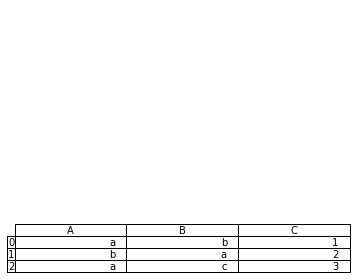

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import table 

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],
                   'C': [1, 2, 3]})
table(ax, df)  # where df is your data frame

plt.savefig('mytable.png')

In [3]:
df12 = pd.read_csv('C:/Users/Aayush Adhikari/_directory/rasa_beginner/actions/lap25.csv')